### Topic Modeling & LDA
- find word topics by author & text

#### Gender & Era
discuss....

In [152]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import plotly_express as px
%matplotlib inline

In [129]:
#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [130]:
n_terms = 4000
n_topics = 40
max_iter = 5
OHCO = ['author', 'title', 'para_num', 'gender', 'era']

In [131]:
#import tables
TOKENS = pd.read_csv('TOKEN2.csv')

In [132]:
TOKENS.head()

text_id  para_num  sent_num  token_num           pos_tuple pos token_str  \
0        1        16         0          0     ('Every', 'DT')  DT     Every   
1        1        16         0          1       ('art', 'NN')  NN       art   
2        1        16         0          2       ('and', 'CC')  CC       and   
3        1        16         0          3     ('every', 'DT')  DT     every   
4        1        16         0          4  ('inquiry,', 'NN')  NN  inquiry,   

  term_str  term_id              title     author  \
0    every    15890  NicomachaenEthics  Aristotle   
1      art     2942  NicomachaenEthics  Aristotle   
2      and     1976  NicomachaenEthics  Aristotle   
3    every    15890  NicomachaenEthics  Aristotle   
4  inquiry    23364  NicomachaenEthics  Aristotle   

                                            file  
0  philostexts\Aristotle_NicomachaenEthics-1.txt  
1  philostexts\Aristotle_NicomachaenEthics-1.txt  
2  philostexts\Aristotle_NicomachaenEthics-1.txt  
3  philostexts\Aristotle_NicomachaenEthics-1.txt  
4  philostexts\Aristotle_NicomachaenEthics-1.txt

In [133]:
#create GENDER column in tokens table 
TOKENS.loc[TOKENS.author.str.contains('Aristotle'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('bellhooks'), 'gender'] = 'F'
TOKENS.loc[TOKENS.author.str.contains('Cicero'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Foucault'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Freire'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('HannahArendt'), 'gender'] = 'F'
TOKENS.loc[TOKENS.author.str.contains('HarrietTaylorMill'), 'gender'] = 'F'
TOKENS.loc[TOKENS.author.str.contains('Hesse'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Hume'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Kant'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Kierkegaard'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Laozi'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Marx'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('MaryWollstonecraft'), 'gender'] = 'F'
TOKENS.loc[TOKENS.author.str.contains('Nietzsche'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Plato'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Simonedebeauvoir'), 'gender'] = 'F'
TOKENS.loc[TOKENS.author.str.contains('StuartMill'), 'gender'] = 'M'

In [134]:
#create ERA column in tokens table - ancient, classical, modern
TOKENS.loc[TOKENS.author.str.contains('Aristotle'), 'era'] = 'ancient'
TOKENS.loc[TOKENS.author.str.contains('bellhooks'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('Cicero'), 'era'] = 'ancient'
TOKENS.loc[TOKENS.author.str.contains('Foucault'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('Freire'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('HannahArendt'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('HarrietTaylorMill'), 'era'] = 'classical'
TOKENS.loc[TOKENS.author.str.contains('Hesse'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('Hume'), 'era'] = 'classical'
TOKENS.loc[TOKENS.author.str.contains('Kant'), 'era'] = 'classical'
TOKENS.loc[TOKENS.author.str.contains('Kierkegaard'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('Laozi'), 'era'] = 'ancient'
TOKENS.loc[TOKENS.author.str.contains('Marx'), 'era'] = 'classical'
TOKENS.loc[TOKENS.author.str.contains('MaryWollstonecraft'), 'era'] = 'classical'
TOKENS.loc[TOKENS.author.str.contains('Nietzsche'), 'era'] = 'classical'
TOKENS.loc[TOKENS.author.str.contains('Plato'), 'era'] = 'ancient'
TOKENS.loc[TOKENS.author.str.contains('Simonedebeauvoir'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('StuartMill'), 'era'] = 'classical'

In [135]:
TOKENS

text_id  para_num  sent_num  token_num           pos_tuple  pos  \
0              1        16         0          0     ('Every', 'DT')   DT   
1              1        16         0          1       ('art', 'NN')   NN   
2              1        16         0          2       ('and', 'CC')   CC   
3              1        16         0          3     ('every', 'DT')   DT   
4              1        16         0          4  ('inquiry,', 'NN')   NN   
...          ...       ...       ...        ...                 ...  ...   
1742815        3       179         0          7  ('working', 'VBG')  VBG   
1742816        3       179         0          8     ('class', 'NN')   NN   
1742817        3       179         0          9       ('and', 'CC')   CC   
1742818        3       179         0         10      ('poor', 'JJ')   JJ   
1742819        3       179         0         11    ('women.', 'NN')   NN   

        token_str term_str  term_id                  title     author  \
0           Every    every    15890      NicomachaenEthics  Aristotle   
1             art      art     2942      NicomachaenEthics  Aristotle   
2             and      and     1976      NicomachaenEthics  Aristotle   
3           every    every    15890      NicomachaenEthics  Aristotle   
4        inquiry,  inquiry    23364      NicomachaenEthics  Aristotle   
...           ...      ...      ...                    ...        ...   
1742815   working  working    49741  FeministClassStruggle  bellhooks   
1742816     class    class     7384  FeministClassStruggle  bellhooks   
1742817       and      and     1976  FeministClassStruggle  bellhooks   
1742818      poor     poor    34409  FeministClassStruggle  bellhooks   
1742819    women.    women    49694  FeministClassStruggle  bellhooks   

                                                      file gender      era  
0            philostexts\Aristotle_NicomachaenEthics-1.txt      M  ancient  
1            philostexts\Aristotle_NicomachaenEthics-1.txt      M  ancient  
2            philostexts\Aristotle_NicomachaenEthics-1.txt      M  ancient  
3            philostexts\Aristotle_NicomachaenEthics-1.txt      M  ancient  
4            philostexts\Aristotle_NicomachaenEthics-1.txt      M  ancient  
...                                                    ...    ...      ...  
1742815  philostexts\bellhooks_FeministClassStruggle-3.txt      F   modern  
1742816  philostexts\bellhooks_FeministClassStruggle-3.txt      F   modern  
1742817  philostexts\bellhooks_FeministClassStruggle-3.txt      F   modern  
1742818  philostexts\bellhooks_FeministClassStruggle-3.txt      F   modern  
1742819  philostexts\bellhooks_FeministClassStruggle-3.txt      F   modern  

[1742820 rows x 14 columns]

In [136]:
#Convert TOKENS to table of paragraphs
#group by paragraph string and set indexes
PARAS = TOKENS[TOKENS.pos.str.match(r'^NNS?$')]\
    .groupby(OHCO).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'para_str'})
PARAS.head()

para_str
author    title             para_num gender era                                
Aristotle NicomachaenEthics 16       M      ancient  art inquiry action pursuit
                            17       M      ancient            good reason good
                            18       M      ancient           things difference
                            19       M      ancient             others products
                            20       M      ancient        activities them ends

#### Create Vector Space & Generate LDA Model


In [137]:
#Use Scikit Learn's CountVectorizer to convert F1 corpus of paragraphs
#into a document-term vector space of word counts.
tfv = CountVectorizer(max_features=n_terms, stop_words='english')
tf = tfv.fit_transform(PARAS.para_str)
TERMS = tfv.get_feature_names_out()

In [138]:
#Generate LDA model
#SUse cikit Learn's LatentDirichletAllocation algorithm and extract the THETA and PHI tables.
lda = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

In [139]:
#THETA 
THETA = pd.DataFrame(lda.fit_transform(tf), index=PARAS.index)
THETA.columns.name = 'topic_id'
THETA.sample(10).style.background_gradient()

In [140]:
#PHI
PHI = pd.DataFrame(lda.components_, columns=TERMS)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'
PHI.T.head().style.background_gradient()

#### Top Terms per Topic

In [141]:
TOPICS = PHI.stack().to_frame().rename(columns={0:'weight'})\
    .groupby('topic_id')\
    .apply(lambda x: 
           x.weight.sort_values(ascending=False)\
               .head(10)\
               .reset_index()\
               .drop('topic_id',1)\
               .term_str)
TOPICS

term_str           0               1              2            3            4  \
topic_id                                                                        
0            husband         opinion         danger        minds      reasons   
1              words            kind        reality         girl    happiness   
2              party           cause        species        cases       origin   
3               work           child       analysis       result         sake   
4              world         society      knowledge   principles      actions   
5               male           earth          terms      account     humanity   
6               life         history          place      thought         race   
7               case           sense         virtue       matter          yes   
8             people             law      existence       number          son   
9             nature         century          value     citizens       regard   
10             order           means          right         self    countries   
11             ideas       influence      attention        flesh     violence   
12              body           death       position  imperialism     thinking   
13            things            hand        respect    situation     property   
14              fact            form     individual        parts       extent   
15            beings             sex       argument         gods     religion   
16             woman         feeling       activity       ground  imagination   
17             power           thing           idea        forms        birth   
18               man           years          times        signs    injustice   
19          question             art           fear        light        faith   
20        experience          mother         living      example       theory   
21             truth        relation      education      leaders   conception   
22              love            mind         person       course          war   
23               way       character          point         view        force   
24             class          desire         moment         wife    necessity   
25        government            good       business   friendship   reflection   
26         principle            role         friend        lover    structure   
27             women          rights         future      meaning      mankind   
28           objects  representation      relations       father   importance   
29            reason           heart         female         ones    pleasures   
30          movement            laws           eyes       effect      classes   
31        philosophy            word  consciousness         mans       police   
32           justice         process         states     equality      parties   
33              time            home           face      virtues    movements   
34          marriage          manner    individuals        hands       status   
35          pleasure        children            day      parents       choice   
36              sort          spirit       elements         evil        doubt   
37             state        language            end       wisdom        group   
38            family             age      condition           op          cit   
39               men          action           soul      freedom        money   

term_str              5              6             7                8  \
topic_id                                                                
0               success       ideology        limits            style   
1               country            non            ad         sciences   
2                 basis        problem        labour          workers   
3               peoples           acts          vice          present   
4             authority      interests        degree          passion   
5                    et          labor         night          attempt   
6            

In [142]:
TOPICS['label'] = TOPICS.apply(lambda x: str(x.name) + ' ' + ' '.join(x), 1)

#### Sort Topics by Doc Weight

<AxesSubplot:ylabel='label'>

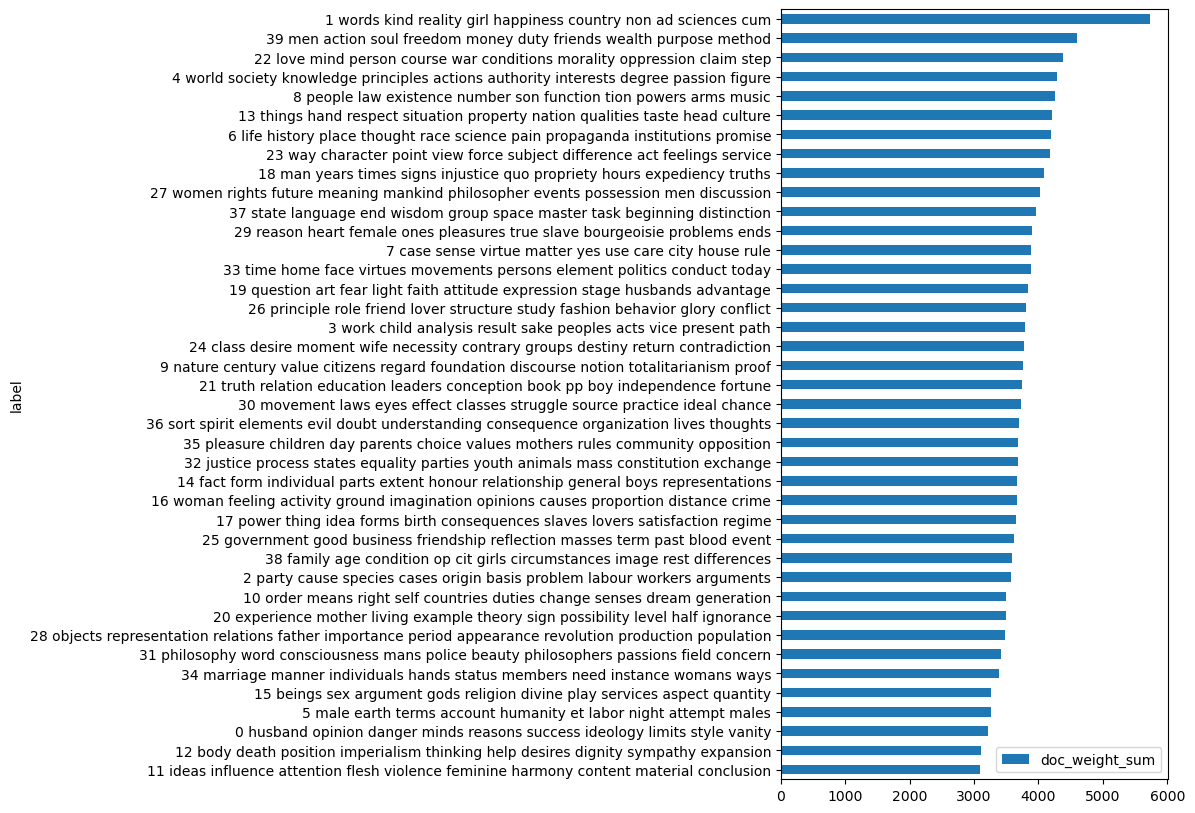

In [143]:
TOPICS['doc_weight_sum'] = THETA.sum()
TOPICS.sort_values('doc_weight_sum', 
                   ascending=True).plot.barh(y='doc_weight_sum',
                                             x='label', 
                                             figsize=(5,10)) 

#### Cluster Topics

In [144]:
def plot_tree(tree, labels):
    plt.figure()
    fig, axes = plt.subplots(figsize=(5, 10))
    dendrogram = sch.dendrogram(tree, labels=labels, orientation="left")
    plt.tick_params(axis='both', which='major', labelsize=14)

<Figure size 640x480 with 0 Axes>

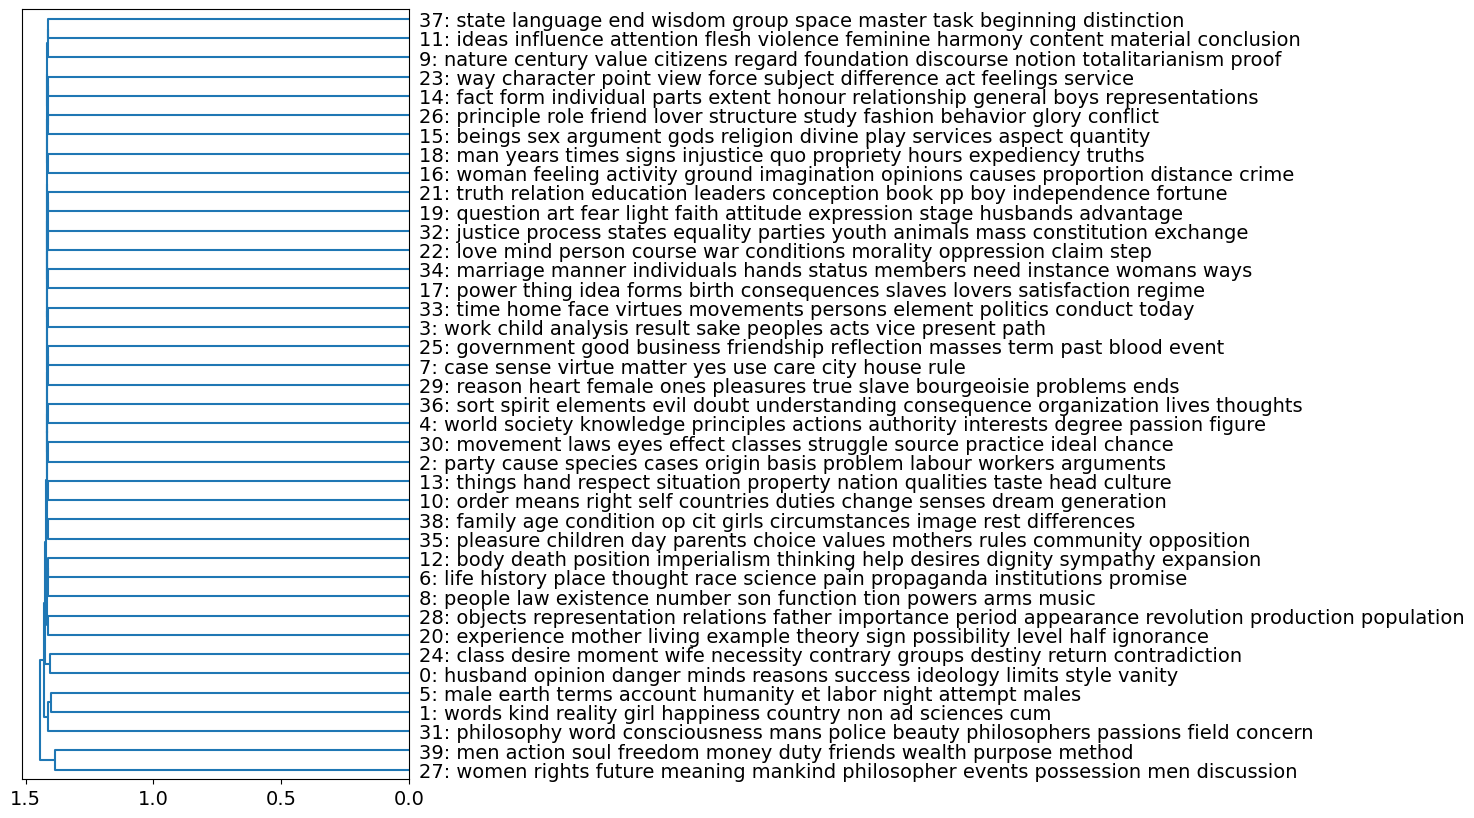

In [145]:
SIMS = pdist(normalize(PHI), metric='euclidean')
TREE = sch.linkage(SIMS, method='ward')

TOPICS['topterms'] = TOPICS[[i for i in range(10)]].apply(lambda x: ' '.join(x), 1)
labels  = ["{}: {}".format(a,b) for a, b in zip(TOPICS.index,  TOPICS.topterms.tolist())]
plot_tree(TREE, labels)

### Explore Topics by Gender

In [146]:
topic_cols = [t for t in range(n_topics)]
GENDER = THETA.groupby('gender')[topic_cols].mean().T                                            
GENDER.index.name = 'topic_id'
GENDER.T

topic_id        0         1         2         3         4         5   \
gender                                                                 
F         0.023391  0.024635  0.024070  0.025738  0.027661  0.024328   
M         0.019194  0.049057  0.023062  0.024315  0.028688  0.018880   

topic_id        6         7         8         9   ...        30        31  \
gender                                            ...                       
F         0.026953  0.022474  0.026613  0.021611  ...  0.025926  0.021590   
M         0.028068  0.028300  0.029183  0.027460  ...  0.023199  0.023199   

topic_id        32        33        34        35        36        37  \
gender                                                                 
F         0.023198  0.025296  0.023556  0.026069  0.023759  0.024380   
M         0.025143  0.025825  0.021203  0.022678  0.024728  0.027542   

topic_id        38        39  
gender                        
F         0.025159  0.030858  
M         0.022265  0.029604  

[2 rows x 40 columns]

In [151]:
GENDER['topterms'] = TOPICS[[i for i in range(10)]].apply(lambda x: ' '.join(x), 1)
GENDER.sort_values('F', ascending=False).style.background_gradient()

In [150]:
GENDER.sort_values('M', ascending=False).style.background_gradient()

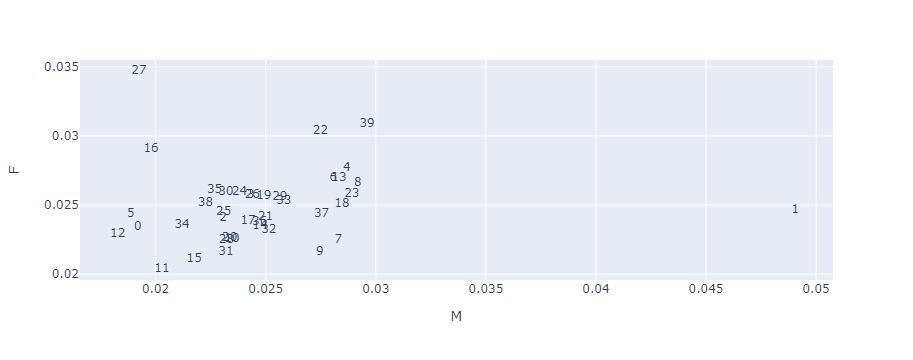

In [153]:
px.scatter(GENDER.reset_index(), 'M', 'F', hover_name='topterms', text='topic_id')\
    .update_traces(mode='text')

#### Cluster

<Figure size 640x480 with 0 Axes>

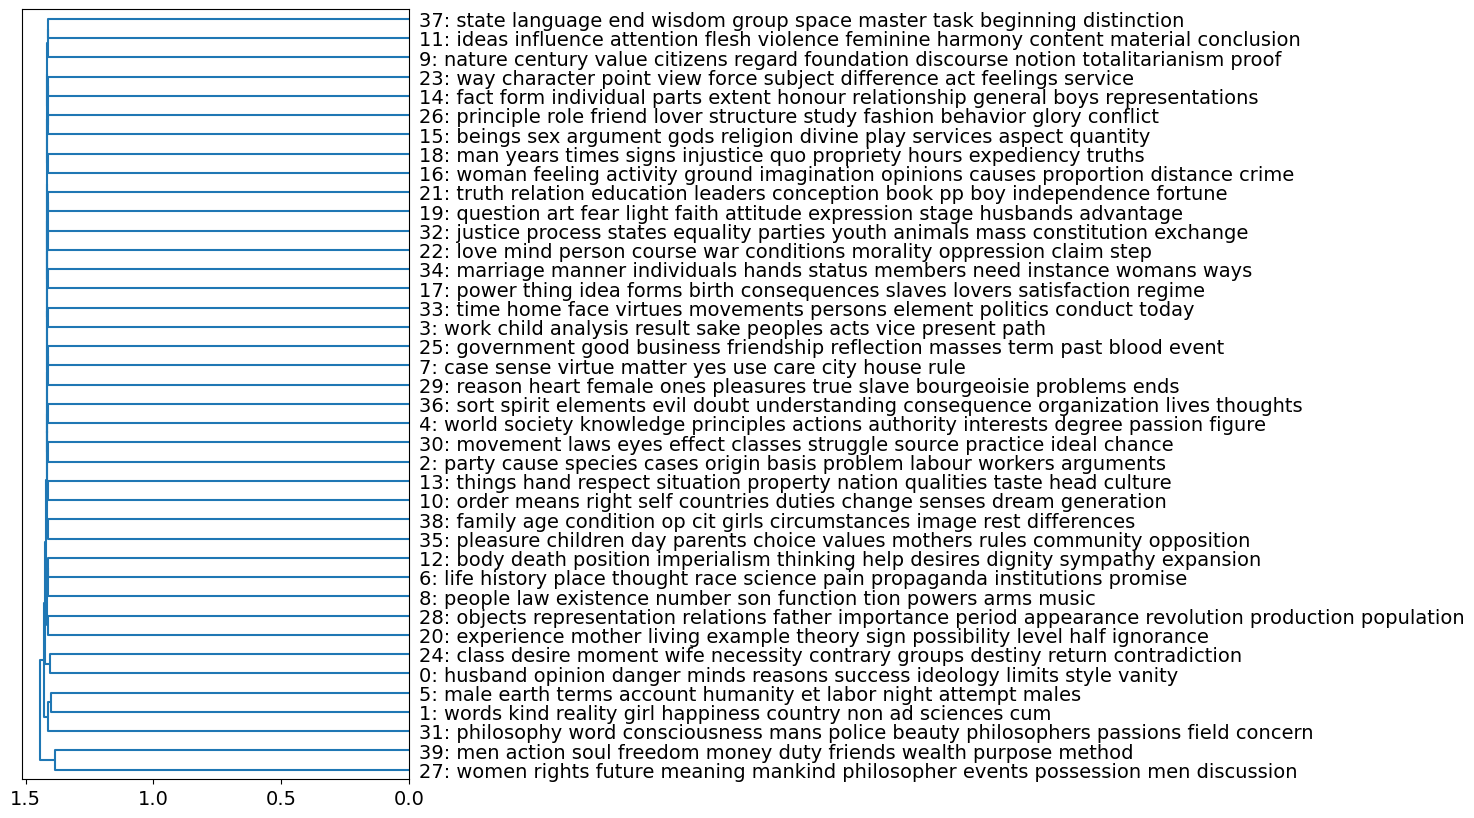

In [154]:
labels  = ["{}: {}".format(a,b) for a, b in zip(GENDER.index,  GENDER.topterms.tolist())]
plot_tree(TREE, labels)

#### Analysis
....

### Explore Topics by Era

In [155]:
ERA = THETA.groupby('era')[topic_cols].mean().T                                            
ERA.index.name = 'topic_id'
ERA.T

topic_id         0         1         2         3         4         5   \
era                                                                     
ancient    0.019279  0.076339  0.020395  0.023340  0.026604  0.019352   
classical  0.022711  0.023844  0.027332  0.024345  0.032831  0.019030   
modern     0.021436  0.026186  0.023649  0.025836  0.027455  0.022986   

topic_id         6         7         8         9   ...        30        31  \
era                                                ...                       
ancient    0.025035  0.034616  0.027522  0.024798  ...  0.022308  0.022138   
classical  0.025532  0.025926  0.025348  0.027024  ...  0.026599  0.023169   
modern     0.029180  0.021815  0.028975  0.024010  ...  0.024701  0.022356   

topic_id         32        33        34        35        36        37  \
era                                                                     
ancient    0.025846  0.024985  0.020605  0.024979  0.024918  0.024730   
classical  0.025810  0.024419  0.021256  0.024334  0.025474  0.024327   
modern     0.023104  0.026171  0.023305  0.023944  0.023651  0.027139   

topic_id         38        39  
era                            
ancient    0.022070  0.032011  
classical  0.021654  0.031635  
modern     0.024837  0.029010  

[3 rows x 40 columns]

In [156]:
ERA['topterms'] = TOPICS[[i for i in range(10)]].apply(lambda x: ' '.join(x), 1)
ERA.sort_values('modern', ascending=False).style.background_gradient()

In [157]:
ERA.sort_values('ancient', ascending=False).style.background_gradient()

In [158]:
ERA.sort_values('classical', ascending=False).style.background_gradient()

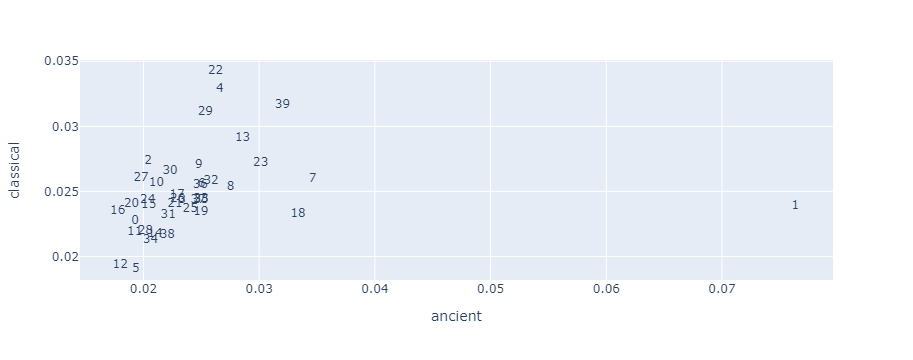

In [163]:
#scatter plot looking at distribution of topics of ancient and classical texts
px.scatter(ERA.reset_index(), 'ancient', 'classical', hover_name='topterms', text='topic_id')\
    .update_traces(mode='text')

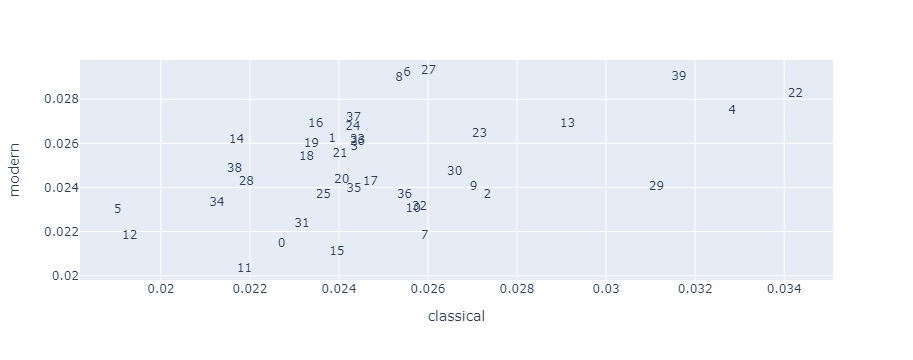

In [166]:
#scatter plot looking at distribution of topics of classical and modern texts
px.scatter(ERA.reset_index(), 'classical', 'modern', hover_name='topterms', text='topic_id')\
    .update_traces(mode='text')

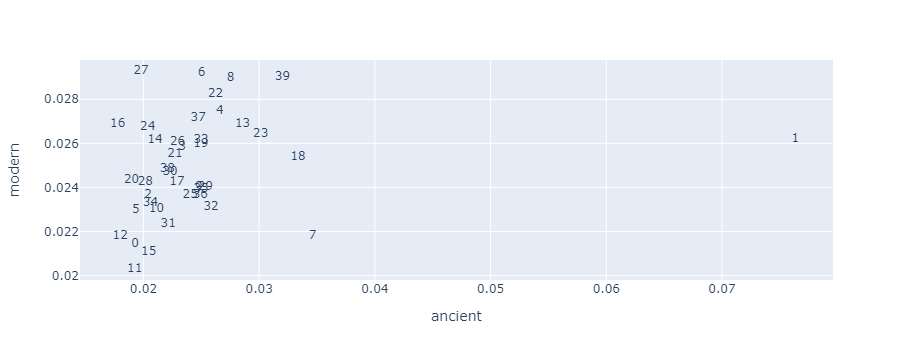

In [165]:
#scatter plot looking at distribution of topics of ancient and modern texts
px.scatter(ERA.reset_index(), 'ancient', 'modern', hover_name='topterms', text='topic_id')\
    .update_traces(mode='text')

<Figure size 640x480 with 0 Axes>

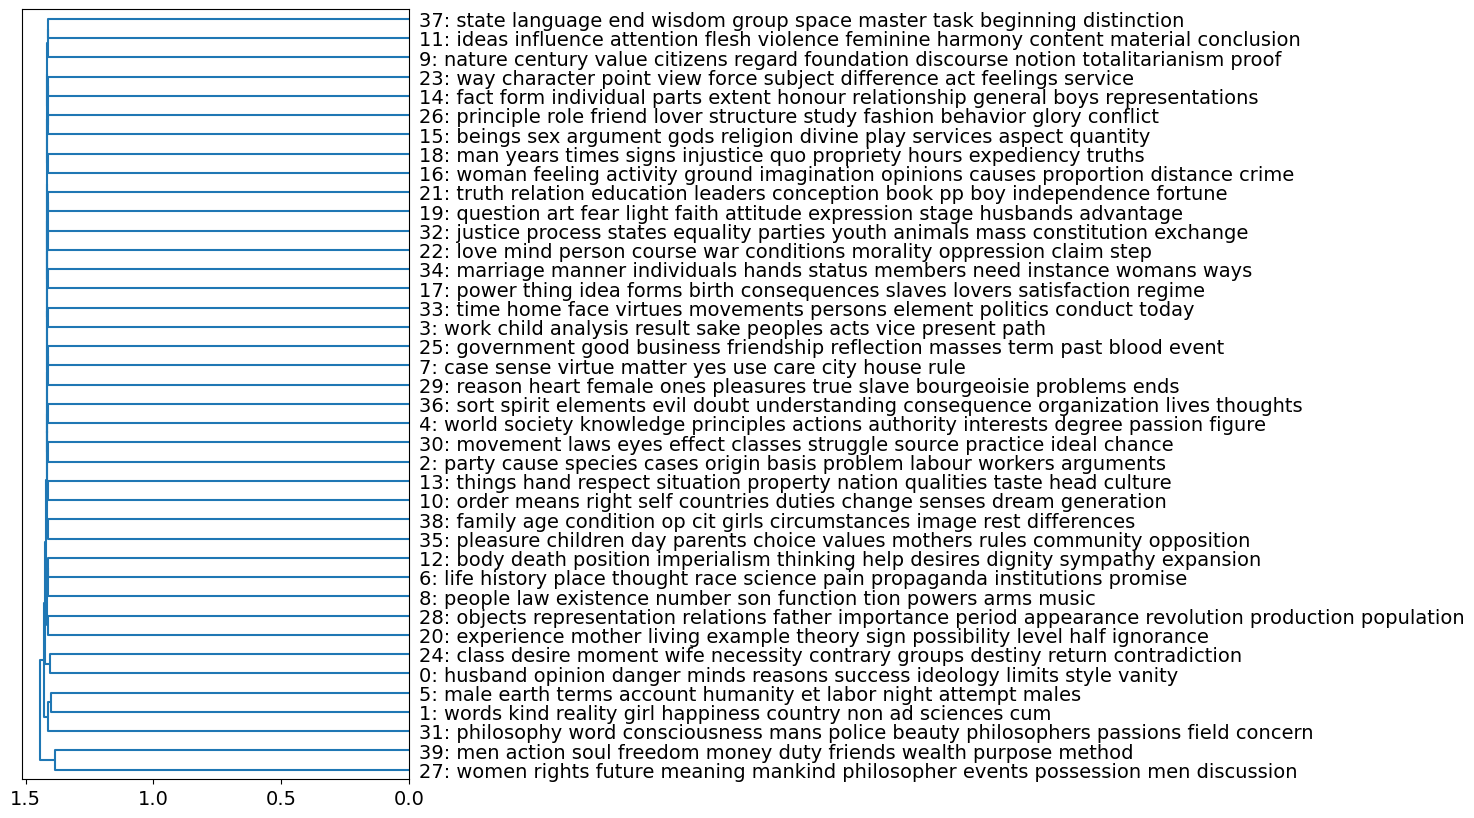

In [167]:
labels  = ["{}: {}".format(a,b) for a, b in zip(ERA.index,  ERA.topterms.tolist())]
plot_tree(TREE, labels)
